<a href="https://colab.research.google.com/github/BayanSafaeian/sales_predictions/blob/main/making_graphs_nice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sales_data_clean = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Coding dojo data/sales_predictions.csv')
sales_data_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#MD is short for missing data, I did this to make the varible names short

## New change I made is that I removed any redunant varibles. If a collumn doesn't have null values that means we don't need a varible for missing data for that column.
Item_Weight_MD = sales_data_clean.Item_Weight.isna()

Outlet_Size_MD = sales_data_clean.Outlet_Size.isna()

#I prepared these varibles for easy location of missing items in their respective collums

In [3]:
#item_data = sales_data_clean.drop( columns= ['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Location_Type','Outlet_Type'])

#item_data.head() 

# I reverted these changes and decidided to just drop the missing values instead

In [4]:
# sales_data_clean.Item_Outlet_Sales[sales_data_clean.Item_Outlet_Sales.isna()] I ran this block of code and replaced 'Item_Outlet_Sales' with the column...
# I wanted to check for missing data. I did this for all columns and found 2 with missing data

In [5]:
sales_data_clean.Item_Fat_Content = sales_data_clean.Item_Fat_Content.replace(to_replace='LF', value= 'Low Fat')
sales_data_clean.Item_Fat_Content = sales_data_clean.Item_Fat_Content.replace(to_replace='low fat', value= 'Low Fat') #using value counts to check for duplicate values and then replacing them using the replace method

sales_data_clean.Item_Fat_Content = sales_data_clean.Item_Fat_Content.replace(to_replace='reg', value= 'Low Fat')

sales_data_clean.Item_Fat_Content.value_counts() #check work for Item_Fat_Content


Low Fat    5634
Regular    2889
Name: Item_Fat_Content, dtype: int64

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

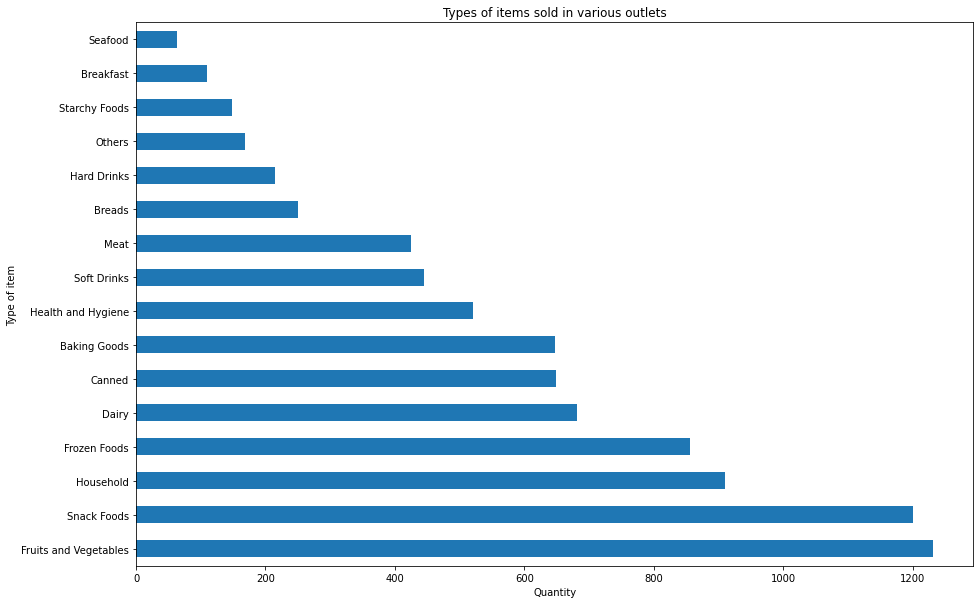

In [6]:
sales_data_clean.Item_Type.value_counts().plot(kind = 'barh',figsize=(15, 10) ) #shows how many of each type of item are sold in various stores

plt.xlabel("Quantity")
plt.ylabel("Type of item")
plt.title("Types of items sold in various outlets")

sns.color_palette(palette= "colorblind")

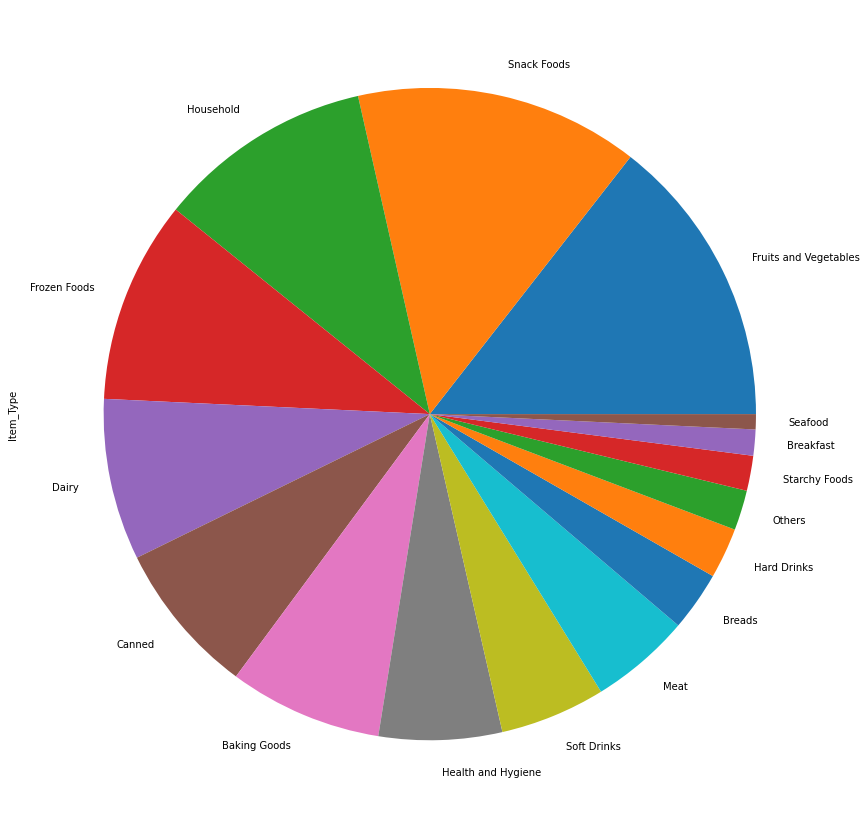

In [7]:
sales_data_clean.Item_Type.value_counts().plot(kind = 'pie', figsize=(15, 15));

In [8]:
corr = sales_data_clean.corr()

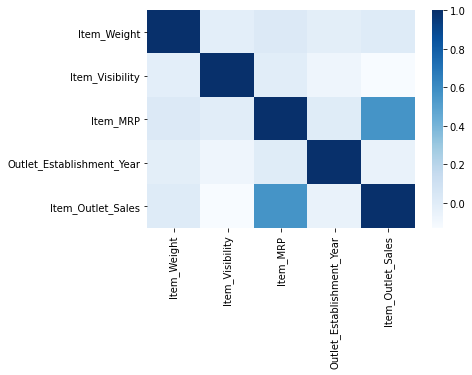

In [9]:
sns.heatmap(corr, cmap= 'Blues') # as we can see here Item_MRP and Item_Outlet_sales are moderately related

Text(0.5, 1.0, 'Fat content in Milk')

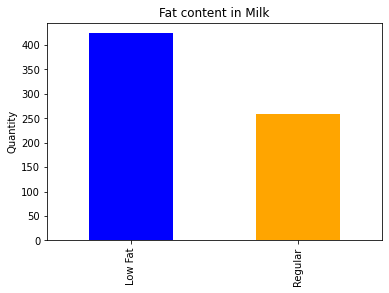

In [14]:
Dairy = sales_data_clean.Item_Type == 'Dairy'

sales_data_clean.Item_Fat_Content[Dairy].value_counts().plot(kind = 'bar', color = ('Blue', "Orange") )

plt.ylabel("Quantity")
plt.title("Fat content in Milk")


Text(0.5, 1.0, 'Fat content in Fruits and Vegetables')

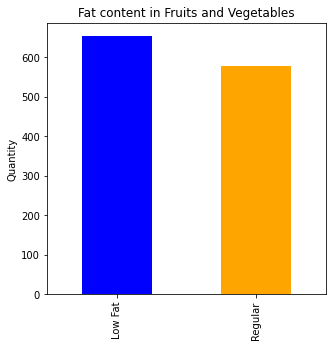

In [15]:
Fruits_veg = sales_data_clean.Item_Type == 'Fruits and Vegetables'

sales_data_clean.Item_Fat_Content[Fruits_veg].value_counts().plot(kind = 'bar' , figsize=(5, 5), color = ('Blue', "Orange") )

plt.ylabel("Quantity")
plt.title("Fat content in Fruits and Vegetables")


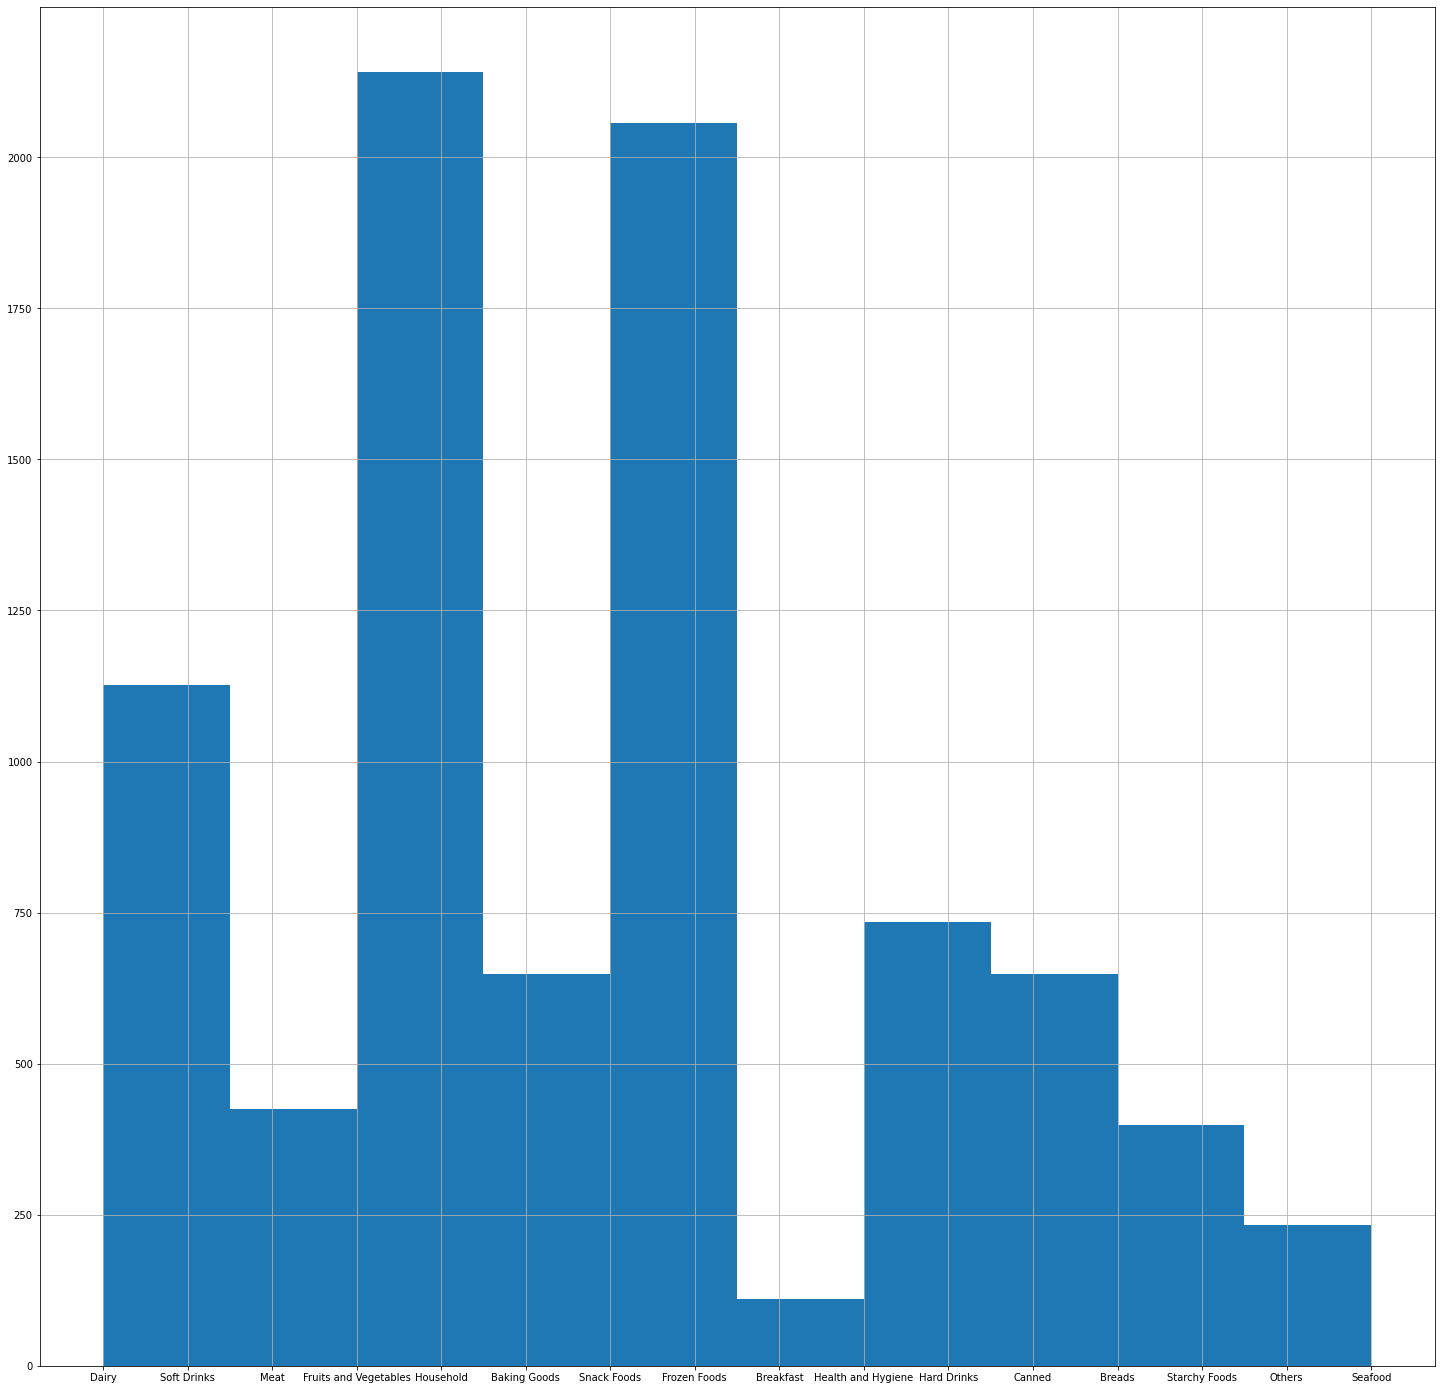

In [12]:
sales_data_clean.Item_Type.hist( figsize=(25, 25))

